In [1]:
# instruction to the notebook stating warning should nit be displays
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (recall_score,accuracy_score,precision_score,roc_curve
                             ,roc_auc_score,confusion_matrix,f1_score)

In [2]:
# temporray file upload - will be alive till the notebook
from google.colab import files
adfile = files.upload()

Saving Wine.csv to Wine (1).csv


In [3]:
df=pd.read_csv('Wine.csv')

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.shape

(178, 14)

In [6]:
df['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

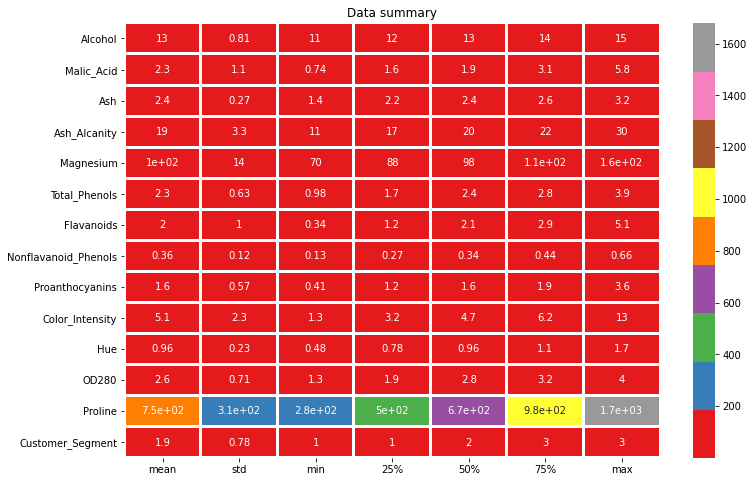

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("Set1"))
plt.title("Data summary")
plt.show()


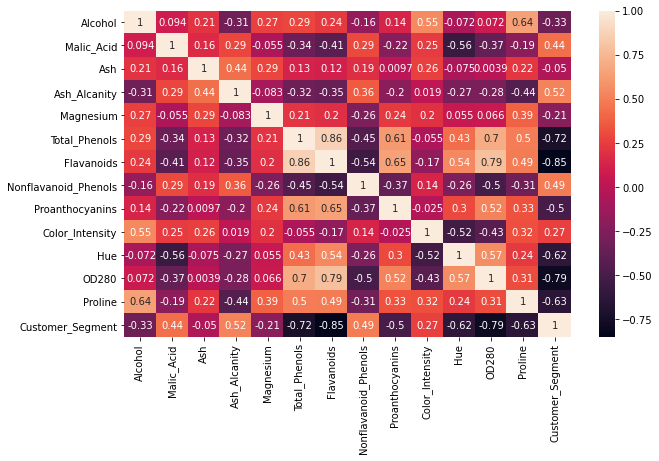

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
print(len(df[df.Customer_Segment == 1]))
print(len(df[df.Customer_Segment==2]))
print(len(df[df.Customer_Segment==3]))

59
71
48


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
for col in df.drop('Customer_Segment',axis=1):
    mm = MinMaxScaler()
    df[col] = mm.fit_transform(df[[col]])
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1


In [14]:
x = df.drop('Customer_Segment',axis=1)
y = df['Customer_Segment']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [16]:
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred =log.predict(x_test)

In [19]:
from sklearn.metrics import (accuracy_score)

In [20]:
print("accuracy:", accuracy_score(y_test, y_pred))


accuracy: 0.9629629629629629


In [21]:
from sklearn.decomposition  import PCA

In [23]:
pca =PCA(n_components=10)
x = df.drop('Customer_Segment',axis=1)
y=df['Customer_Segment']

x_pca = pca.fit_transform(x)

In [28]:
log = LogisticRegression()
log.fit(x_pca,y)
log.score(x_pca,y)

0.9887640449438202

In [29]:
pca.explained_variance_

array([0.2200922 , 0.10246084, 0.04624247, 0.04011226, 0.03005877,
       0.02516286, 0.01978926, 0.01301012, 0.01228411, 0.01215769])

In [26]:
pca.explained_variance_ratio_

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965])

In [30]:
for n in range(10, 1,-1):
  pca =PCA(n_components=5)
  x_pca = pca.fit_transform(x)
  lr = LogisticRegression()
  lr.fit(x_pca,y)
  print(n,":",lr.score(x_pca,y))

10 : 0.9831460674157303
9 : 0.9831460674157303
8 : 0.9831460674157303
7 : 0.9831460674157303
6 : 0.9831460674157303
5 : 0.9831460674157303
4 : 0.9831460674157303
3 : 0.9831460674157303
2 : 0.9831460674157303


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
x_train,x_test , y_train,y_test = train_test_split(df.drop('Customer_Segment',axis=1), df['Customer_Segment'],test_size=0.2,random_state =1)
rfc = RandomForestClassifier(n_estimators=10,n_jobs=2,verbose=2)
rfc.fit(x_train, y_train)

building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=None, verbose=2,
                       warm_start=False)

In [44]:
rfc.score(x_test, y_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9166666666666666

In [45]:
rfc.feature_importances_

array([0.10593047, 0.03984134, 0.0248125 , 0.01707199, 0.04824442,
       0.09949498, 0.25186831, 0.00468513, 0.00384299, 0.11893264,
       0.05776792, 0.04474367, 0.18276364])

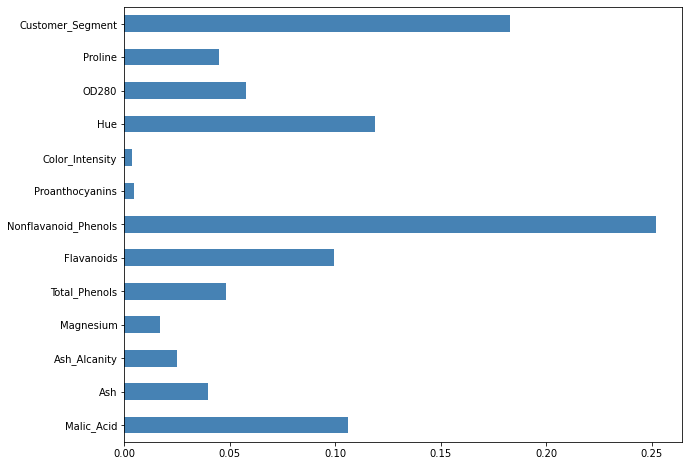

In [46]:
plt.figure(figsize=(10,8))
pd.Series(rfc.feature_importances_, index=df.columns[1:]).plot.barh(color='steelblue')